<a href="https://colab.research.google.com/github/Hassani12-p/TP1/blob/master/Predict_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problème Buisness:**

   Prévoir le taux de désabonnement des clients, c'est savoir quels clients sont susceptibles de s'en désabonner. Pour les banques , il s'agit d'une prédiction importante. En effet, l'acquisition de nouveaux clients coûte souvent plus cher que la fidélisation des clients existants. Une fois que nous avons identifié les clients qui risquent de quitter le service, nous devons savoir exactement quels efforts de marketing nous devons déployer auprès de chacun d'entre eux pour maximiser leurs chances de rester.
   
   Notre modèle repose sur deux hypothèses :

    -Les clients peuvent être regroupés de manière optimale. Il est essentiel de connaître les clients et leurs besoins. Si nous sommes en mesure de les classer en différents groupes, nous pouvons appliquer des solutions préventives spécifiques en fonction des caractéristiques de chaque groupe.

    -Il est possible de prédire si un client va partir ou non. Cela se fera au moyen de l'apprentissage profond. Nous nous attendons à une grande précision.


**Loading Datasets**

**1-Importing libraries**

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [14]:
dataset = pd.read_csv("/content/churn_prediction.csv")

**2-Data Dictionary**

L'ensemble de données contient plusieurs variables qui peuvent être divisées en trois catégories :
    
I. Informations démographiques sur les clients   


    customer_id - Identifiant du client
    vintage - Ancienneté du client auprès de la banque en nombre de jours
    age - Âge du client
    dependents - Nombre de personnes à charge
    occupation - Profession du client
    city - Ville du client


II. Relations du client avec la banque

    customer_nw_category - Valeur nette du client (3 : faible 2 : moyenne 1 : élevée)
    branch_code - Code de l'agence pour le compte d'un client
    days_since_last_transaction - Nombre de jours depuis le dernier crédit au cours des 1 dernières années
III. Informations transactionnelles

    current_balance - Solde à la date d'aujourd'hui
    previous_month_end_balance - Solde de fin de mois du mois précédent
    average_monthly_balance_prevQ - Solde mensuel moyen (AMB) du trimestre précédent
    average_monthly_balance_prevQ2 - Soldes mensuels moyens (AMB) au cours du trimestre précédent # # average_monthly_balance_prevQ2 - Soldes mensuels moyens (AMB) au cours du trimestre précédent
    current_month_credit - Montant total du crédit pour le mois en cours
    previous_month_credit - Montant total du crédit du mois précédent current_month_debit - Montant total du débit pour le mois en cours
    previous_month_debit - Montant total du débit du mois précédent  current_month_balance - Solde moyen du mois en cours
    previous_month_balance - Solde moyen du mois en cours

In [15]:
dataset.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [16]:
dataset

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


**3-Cleaning**

    Eliminate unnecesary attributes.
    Transformation of variable Gender: {Male, Female} into IsMale: {0, 1}.
    Categorical data: one-hot encoding.
    Normalization of numerical data.
    Definition of X (input variables) and Y (output/target).

In [17]:
dataset.dropna(inplace=True)

In [18]:
dataset=dataset.drop_duplicates()
dataset

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,Male,0.0,retired,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
7,9,1145,46,Male,0.0,self_employed,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28375,30295,2041,42,Male,0.0,self_employed,146.0,2,286,57.0,...,6777.41,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1


In [19]:
dataset=dataset.reset_index(drop=True)
dataset

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,Male,0.0,retired,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,Male,0.0,self_employed,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22062,30295,2041,42,Male,0.0,self_employed,146.0,2,286,57.0,...,6777.41,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0
22063,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
22064,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
22065,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1


In [20]:
dataset.rename(columns={'gender': 'isMale'}, inplace=True)
dataset['isMale'].replace(['Male', 'Female'], ['1', '0'], inplace=True)


In [21]:
print(dataset['isMale'].unique())


['1' '0']


In [ ]:
dataset

,customer_id,vintage,age,isMale,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,1,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,1,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,0,0.0,self_employed,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,1,0.0,retired,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,1,0.0,self_employed,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22062,30295,2041,42,1,0.0,self_employed,146.0,2,286,57.0,...,6777.41,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0
22063,30297,1845,10,0,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
22064,30298,4919,34,0,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
22065,30299,297,47,1,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1


In [22]:
dataset.drop([ 'customer_id'], axis=1, inplace=True)
dataset

,vintage,age,isMale,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,3135,66,1,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2531,42,1,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,263,42,0,0.0,self_employed,1096.0,2,1666,60.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,5922,72,1,0.0,retired,1020.0,1,1,98.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,1145,46,1,0.0,self_employed,623.0,2,317,172.0,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22062,2041,42,1,0.0,self_employed,146.0,2,286,57.0,7493.69,6777.41,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0
22063,1845,10,0,0.0,student,1020.0,2,1207,70.0,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
22064,4919,34,0,0.0,self_employed,1046.0,2,223,14.0,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
22065,297,47,1,0.0,salaried,1096.0,2,588,0.0,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1


In [23]:
# Create a condition to filter ages outside the range (18, 100)
condition = (dataset['age'] <= 18) | (dataset['age'] >= 100)

# Get the indices of rows that do not meet the condition
indices_to_modify = dataset[condition].index

# Modify the 'age' values for those rows by adding a random number between 18 and 100
dataset.loc[indices_to_modify, 'age'] += np.random.randint(18, 101, len(indices_to_modify))
dataset

,vintage,age,isMale,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,3135,66,1,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2531,42,1,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,263,42,0,0.0,self_employed,1096.0,2,1666,60.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,5922,72,1,0.0,retired,1020.0,1,1,98.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,1145,46,1,0.0,self_employed,623.0,2,317,172.0,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22062,2041,42,1,0.0,self_employed,146.0,2,286,57.0,7493.69,6777.41,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0
22063,1845,47,0,0.0,student,1020.0,2,1207,70.0,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
22064,4919,34,0,0.0,self_employed,1046.0,2,223,14.0,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
22065,297,47,1,0.0,salaried,1096.0,2,588,0.0,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1


In [24]:
# Fill missing values with the most common occupation
most_common_occupation = dataset['occupation'].mode()[0]
dataset['occupation'].fillna(most_common_occupation, inplace=True)



In [ ]:
print(dataset.dtypes)

vintage                             int64
age                                 int64
isMale                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object


In [25]:
dataset.isnull().sum()

vintage                           0
age                               0
isMale                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [26]:
dataset.to_csv('cleaned_data.csv', index=False)
dataset

,vintage,age,isMale,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,3135,66,1,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2531,42,1,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,263,42,0,0.0,self_employed,1096.0,2,1666,60.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,5922,72,1,0.0,retired,1020.0,1,1,98.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,1145,46,1,0.0,self_employed,623.0,2,317,172.0,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22062,2041,42,1,0.0,self_employed,146.0,2,286,57.0,7493.69,6777.41,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0
22063,1845,47,0,0.0,student,1020.0,2,1207,70.0,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
22064,4919,34,0,0.0,self_employed,1046.0,2,223,14.0,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
22065,297,47,1,0.0,salaried,1096.0,2,588,0.0,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1


In [28]:
bank_data = pd.read_csv("/content/cleaned_data.csv")
bank_data

,vintage,age,isMale,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,3135,66,1,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2531,42,1,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,263,42,0,0.0,self_employed,1096.0,2,1666,60.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,5922,72,1,0.0,retired,1020.0,1,1,98.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,1145,46,1,0.0,self_employed,623.0,2,317,172.0,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22062,2041,42,1,0.0,self_employed,146.0,2,286,57.0,7493.69,6777.41,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0
22063,1845,47,0,0.0,student,1020.0,2,1207,70.0,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
22064,4919,34,0,0.0,self_employed,1046.0,2,223,14.0,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
22065,297,47,1,0.0,salaried,1096.0,2,588,0.0,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1


In [29]:
# Separating numerical (to normalize) and categorical variables (one-hot encoding)
num_subset = bank_data.select_dtypes('number')
cat_subset = bank_data.select_dtypes('object')

In [30]:
num_subset

,vintage,age,isMale,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,3135,66,1,0.0,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2531,42,1,2.0,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,263,42,0,0.0,1096.0,2,1666,60.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,5922,72,1,0.0,1020.0,1,1,98.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,1145,46,1,0.0,623.0,2,317,172.0,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22062,2041,42,1,0.0,146.0,2,286,57.0,7493.69,6777.41,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0
22063,1845,47,0,0.0,1020.0,2,1207,70.0,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
22064,4919,34,0,0.0,1046.0,2,223,14.0,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
22065,297,47,1,0.0,1096.0,2,588,0.0,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1


In [31]:
cat_subset

,occupation
0,self_employed
1,self_employed
2,self_employed
3,retired
4,self_employed
...,...
22062,self_employed
22063,student
22064,self_employed
22065,salaried


In [32]:
#replace cat to num
le=LabelEncoder()
for i in cat_subset:
  cat_subset[i]=le.fit_transform(cat_subset[i])

cat_subset

,occupation
0,3
1,3
2,3
3,1
4,3
...,...
22062,3
22063,4
22064,3
22065,2


In [33]:
# Normalizing numerical variables
maxvals = num_subset.astype(float).max()                      # Finds maximum value
numericalColumns = {'isMale','vintage', 'age', 'city','dependents', 'branch_code', 'days_since_last_transaction', 'current_balance','previous_month_end_balance','average_monthly_balance_prevQ','average_monthly_balance_prevQ2','current_month_credit','previous_month_credit','current_month_debit','previous_month_debit','current_month_balance','previous_month_balance','churn'}
for col in numericalColumns:
        num_subset[col] = num_subset[col] / maxvals[col]   # Divide each column (variable) by its maximum
bank_data = pd.concat([cat_subset, num_subset], axis=1)
bank_data

,occupation,vintage,age,isMale,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,3,0.276138,0.559322,1.0,0.000000,0.113402,2,0.157884,0.613699,0.001356,0.001457,0.001223,0.001692,1.630012e-08,8.468088e-08,2.618535e-08,1.414259e-07,0.001357,0.001100,0.0
1,3,0.222937,0.355932,1.0,0.038462,0.906004,3,0.081138,0.158904,0.000862,0.001400,0.001378,0.002184,2.689520e-08,3.025690e-04,7.706612e-05,1.087608e-03,0.001077,0.001264,1.0
2,3,0.023166,0.355932,0.0,0.000000,0.664645,2,0.348390,0.164384,0.014127,0.016041,0.012754,0.016109,2.934022e-08,1.524256e-07,1.122697e-04,2.022885e-04,0.014628,0.011572,0.0
3,1,0.521624,0.610169,1.0,0.000000,0.618557,1,0.000209,0.268493,0.006511,0.007706,0.006590,0.013113,5.216040e-08,2.709788e-07,1.701577e-04,3.106137e-04,0.006585,0.005847,0.0
4,3,0.100854,0.389831,1.0,0.000000,0.377805,2,0.066290,0.471233,0.009383,0.008510,0.005460,0.019045,2.200517e-08,1.143192e-07,5.801758e-05,4.022464e-03,0.007969,0.004008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22062,3,0.179776,0.355932,1.0,0.000000,0.088539,2,0.059808,0.156164,0.006964,0.006770,0.006777,0.004103,4.156532e-08,3.814874e-05,1.444384e-04,8.365625e-04,0.007404,0.005602,0.0
22063,4,0.162512,0.398305,0.0,0.000000,0.618557,2,0.252405,0.191781,0.001000,0.001075,0.001913,0.003254,2.445019e-08,1.270213e-07,3.927803e-08,2.121389e-07,0.001002,0.000811,0.0
22064,3,0.433278,0.288136,0.0,0.000000,0.634324,2,0.046633,0.038356,0.003572,0.004065,0.003076,0.004513,1.393661e-07,9.695961e-07,1.179650e-04,7.170788e-04,0.003479,0.002782,0.0
22065,2,0.026160,0.398305,1.0,0.000000,0.664645,2,0.122961,0.000000,0.060880,0.060949,0.044810,0.025596,3.803504e-04,1.644105e-03,2.202581e-05,5.077190e-05,0.056837,0.043396,1.0


In [34]:

# We save a denormalized but organized version of the dataset. This will be useful for some figures.
denorm_bank_data = pd.concat([cat_subset, num_subset], axis=1)
bank_data

,occupation,vintage,age,isMale,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,3,0.276138,0.559322,1.0,0.000000,0.113402,2,0.157884,0.613699,0.001356,0.001457,0.001223,0.001692,1.630012e-08,8.468088e-08,2.618535e-08,1.414259e-07,0.001357,0.001100,0.0
1,3,0.222937,0.355932,1.0,0.038462,0.906004,3,0.081138,0.158904,0.000862,0.001400,0.001378,0.002184,2.689520e-08,3.025690e-04,7.706612e-05,1.087608e-03,0.001077,0.001264,1.0
2,3,0.023166,0.355932,0.0,0.000000,0.664645,2,0.348390,0.164384,0.014127,0.016041,0.012754,0.016109,2.934022e-08,1.524256e-07,1.122697e-04,2.022885e-04,0.014628,0.011572,0.0
3,1,0.521624,0.610169,1.0,0.000000,0.618557,1,0.000209,0.268493,0.006511,0.007706,0.006590,0.013113,5.216040e-08,2.709788e-07,1.701577e-04,3.106137e-04,0.006585,0.005847,0.0
4,3,0.100854,0.389831,1.0,0.000000,0.377805,2,0.066290,0.471233,0.009383,0.008510,0.005460,0.019045,2.200517e-08,1.143192e-07,5.801758e-05,4.022464e-03,0.007969,0.004008,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22062,3,0.179776,0.355932,1.0,0.000000,0.088539,2,0.059808,0.156164,0.006964,0.006770,0.006777,0.004103,4.156532e-08,3.814874e-05,1.444384e-04,8.365625e-04,0.007404,0.005602,0.0
22063,4,0.162512,0.398305,0.0,0.000000,0.618557,2,0.252405,0.191781,0.001000,0.001075,0.001913,0.003254,2.445019e-08,1.270213e-07,3.927803e-08,2.121389e-07,0.001002,0.000811,0.0
22064,3,0.433278,0.288136,0.0,0.000000,0.634324,2,0.046633,0.038356,0.003572,0.004065,0.003076,0.004513,1.393661e-07,9.695961e-07,1.179650e-04,7.170788e-04,0.003479,0.002782,0.0
22065,2,0.026160,0.398305,1.0,0.000000,0.664645,2,0.122961,0.000000,0.060880,0.060949,0.044810,0.025596,3.803504e-04,1.644105e-03,2.202581e-05,5.077190e-05,0.056837,0.043396,1.0


In [35]:
target=num_subset['churn']

In [36]:
# Define features (X) and target variable (Y)

bankX = bank_data.iloc[:,:19]
bankY = bank_data.iloc[:,19:20]

X = bankX.values
Y = bankY.values


**Exploratory Data Analysis**

  Dans cette section, nous essaierons d'avoir un aperçu de la nature des variables et de la relation entre elles. Cela sera essentiel non seulement pour comprendre la situation actuelle de l’institution et le regroupement de ses clients, mais aussi pour évaluer quel type de clients entraîne une perte plus importante.

In [37]:
bank_data.describe()

,occupation,vintage,age,isMale,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,22067.000000,2.206700e+04,2.206700e+04,2.206700e+04,2.206700e+04,22067.000000,22067.000000,22067.000000
mean,2.656455,0.224352,0.416417,0.608193,0.007259,0.485336,2.211991,0.182861,0.183383,0.006628,0.007214,0.006022,0.007816,3.213622e-04,1.601047e-03,5.329459e-04,2.630757e-03,0.006668,0.005414,0.193683
std,0.710355,0.140815,0.137308,0.488165,0.020089,0.261646,0.669556,0.189093,0.230503,0.018835,0.021027,0.016158,0.019965,7.059380e-03,1.377822e-02,7.497450e-03,1.780209e-02,0.018230,0.015814,0.395192
min,0.000000,0.015855,0.161017,0.000000,0.000000,0.000000,1.000000,0.000209,0.000000,-0.005115,-0.003142,0.001198,-0.019269,8.150062e-10,4.234044e-09,1.309268e-09,7.071295e-09,-0.003140,-0.003899,0.000000
25%,2.000000,0.116357,0.313559,0.000000,0.000000,0.248029,2.000000,0.033250,0.030137,0.001658,0.001904,0.001853,0.002122,2.934022e-08,1.566596e-07,6.153558e-08,3.464935e-07,0.001889,0.001576,0.000000
50%,3.000000,0.193958,0.398305,1.000000,0.000000,0.514251,2.000000,0.111041,0.076712,0.003100,0.003423,0.003012,0.003947,9.209570e-08,2.726724e-06,2.811391e-05,1.615791e-04,0.003259,0.002645,0.000000
75%,3.000000,0.296838,0.508475,1.000000,0.000000,0.664645,3.000000,0.287327,0.246575,0.006320,0.006818,0.005717,0.007738,8.099369e-05,4.780722e-04,2.067622e-04,1.161938e-03,0.006382,0.005111,0.000000
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000


In [38]:
bank_data['churn'].value_counts()

0.0    17793
1.0     4274
Name: churn, dtype: int64

In [51]:

#create two different dataframe of majority and minority class
df_majority = bank_data[(bank_data['churn']==0)]
df_minority = bank_data[(bank_data['churn']==1)]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 131177, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])
df_upsampled['churn'].value_counts()


1.0    131177
0.0     17793
Name: churn, dtype: int64

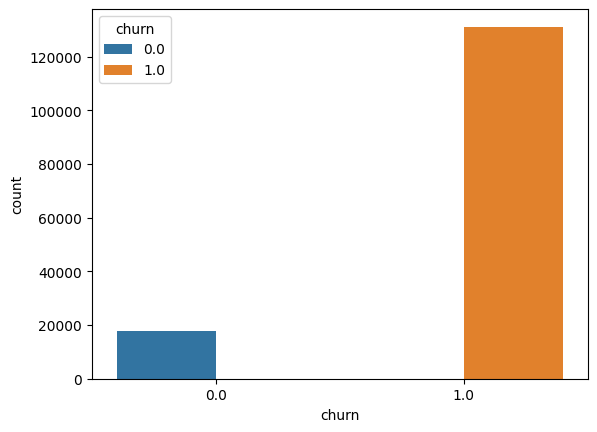

In [55]:
sns.countplot(x='churn', data=df_upsampled, hue='churn')
plt.show()

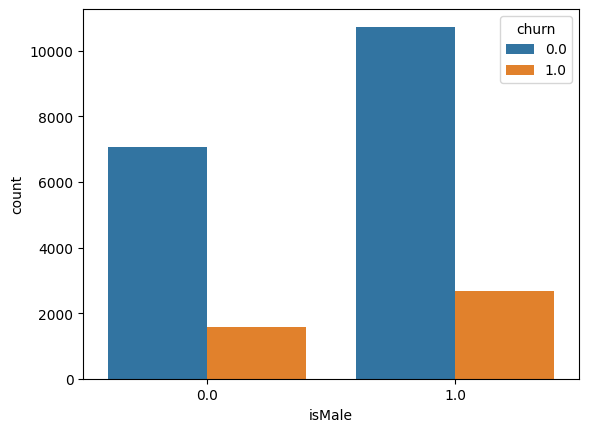

In [40]:
sns.countplot(x='isMale', hue='churn', data=bank_data)
plt.show()

<Axes: xlabel='churn', ylabel='age'>

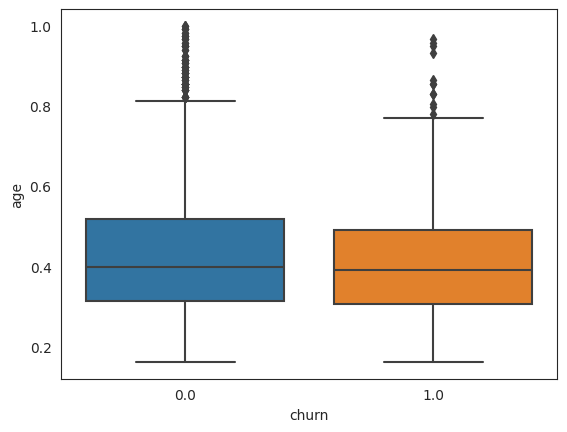

In [80]:
sns.boxplot(x="churn", y="age", data=bank_data)

<Axes: xlabel='vintage', ylabel='count'>

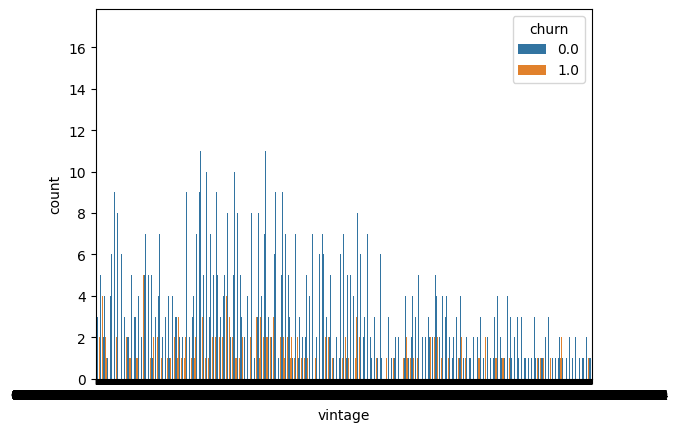

In [41]:
sns.countplot(x='vintage', hue='churn', data=bank_data)

In [89]:
# Assuming 'churn' is the column in your DataFrame
numRetained = bank_data[bank_data['churn'] == 0].shape[0]
numChurned = bank_data[bank_data['churn'] == 1].shape[0]

# Print the percentage of customers that stayed
print(numRetained / (numRetained + numChurned) * 100, '% of customers stayed in the Bank')

# Print the percentage of customers that left
print(numChurned / (numRetained + numChurned) * 100, '% of customers left the Bank')


80.63171251189559 % of customers stayed in the Bank
19.36828748810441 % of customers left the Bank


In [87]:
fig1 = px.histogram(bank_data, x='age', y='current_balance', color='churn')
fig1.update_layout({'plot_bgcolor': 'white',
'paper_bgcolor': 'white'}, font_color = 'black')
fig1.show()

array([<Axes: title={'center': 'current_balance'}>,
       <Axes: title={'center': 'days_since_last_transaction'}>],
      dtype=object)

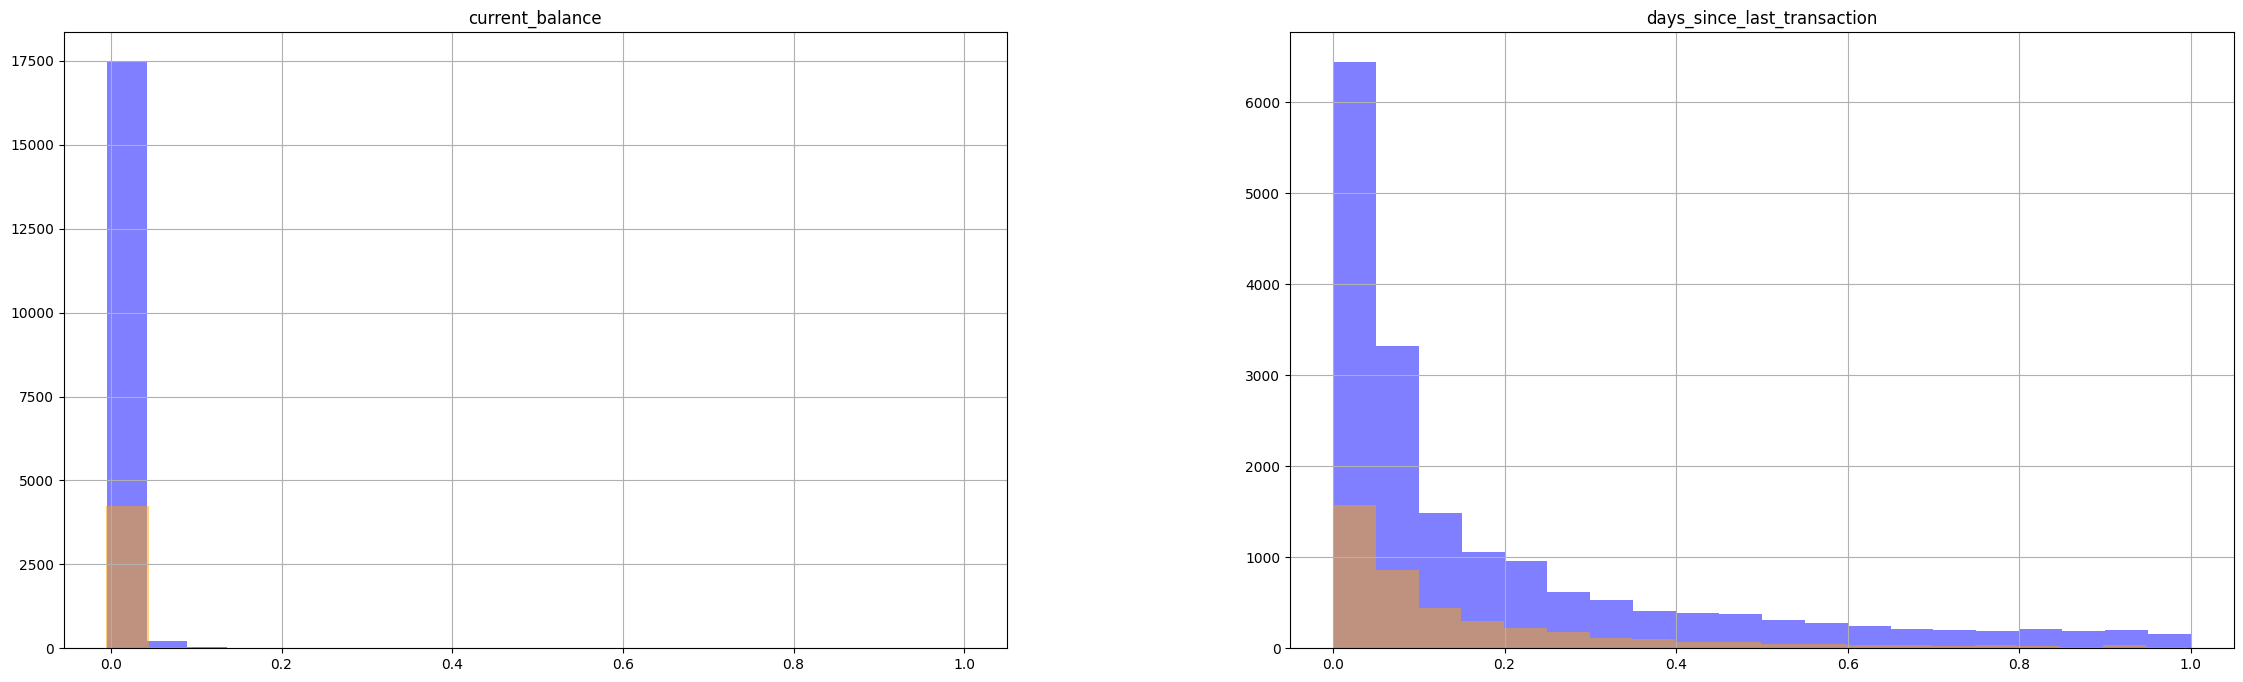

In [58]:
numericFeatures = ['current_balance', 'days_since_last_transaction']
fig, ax = plt.subplots(1,2, figsize=(28, 8))
bank_data[bank_data.churn == 0][numericFeatures].hist(bins=20, color='blue', alpha=0.5, ax=ax)
bank_data[bank_data.churn == 1][numericFeatures].hist(bins=20, color='orange', alpha=0.5, ax=ax)

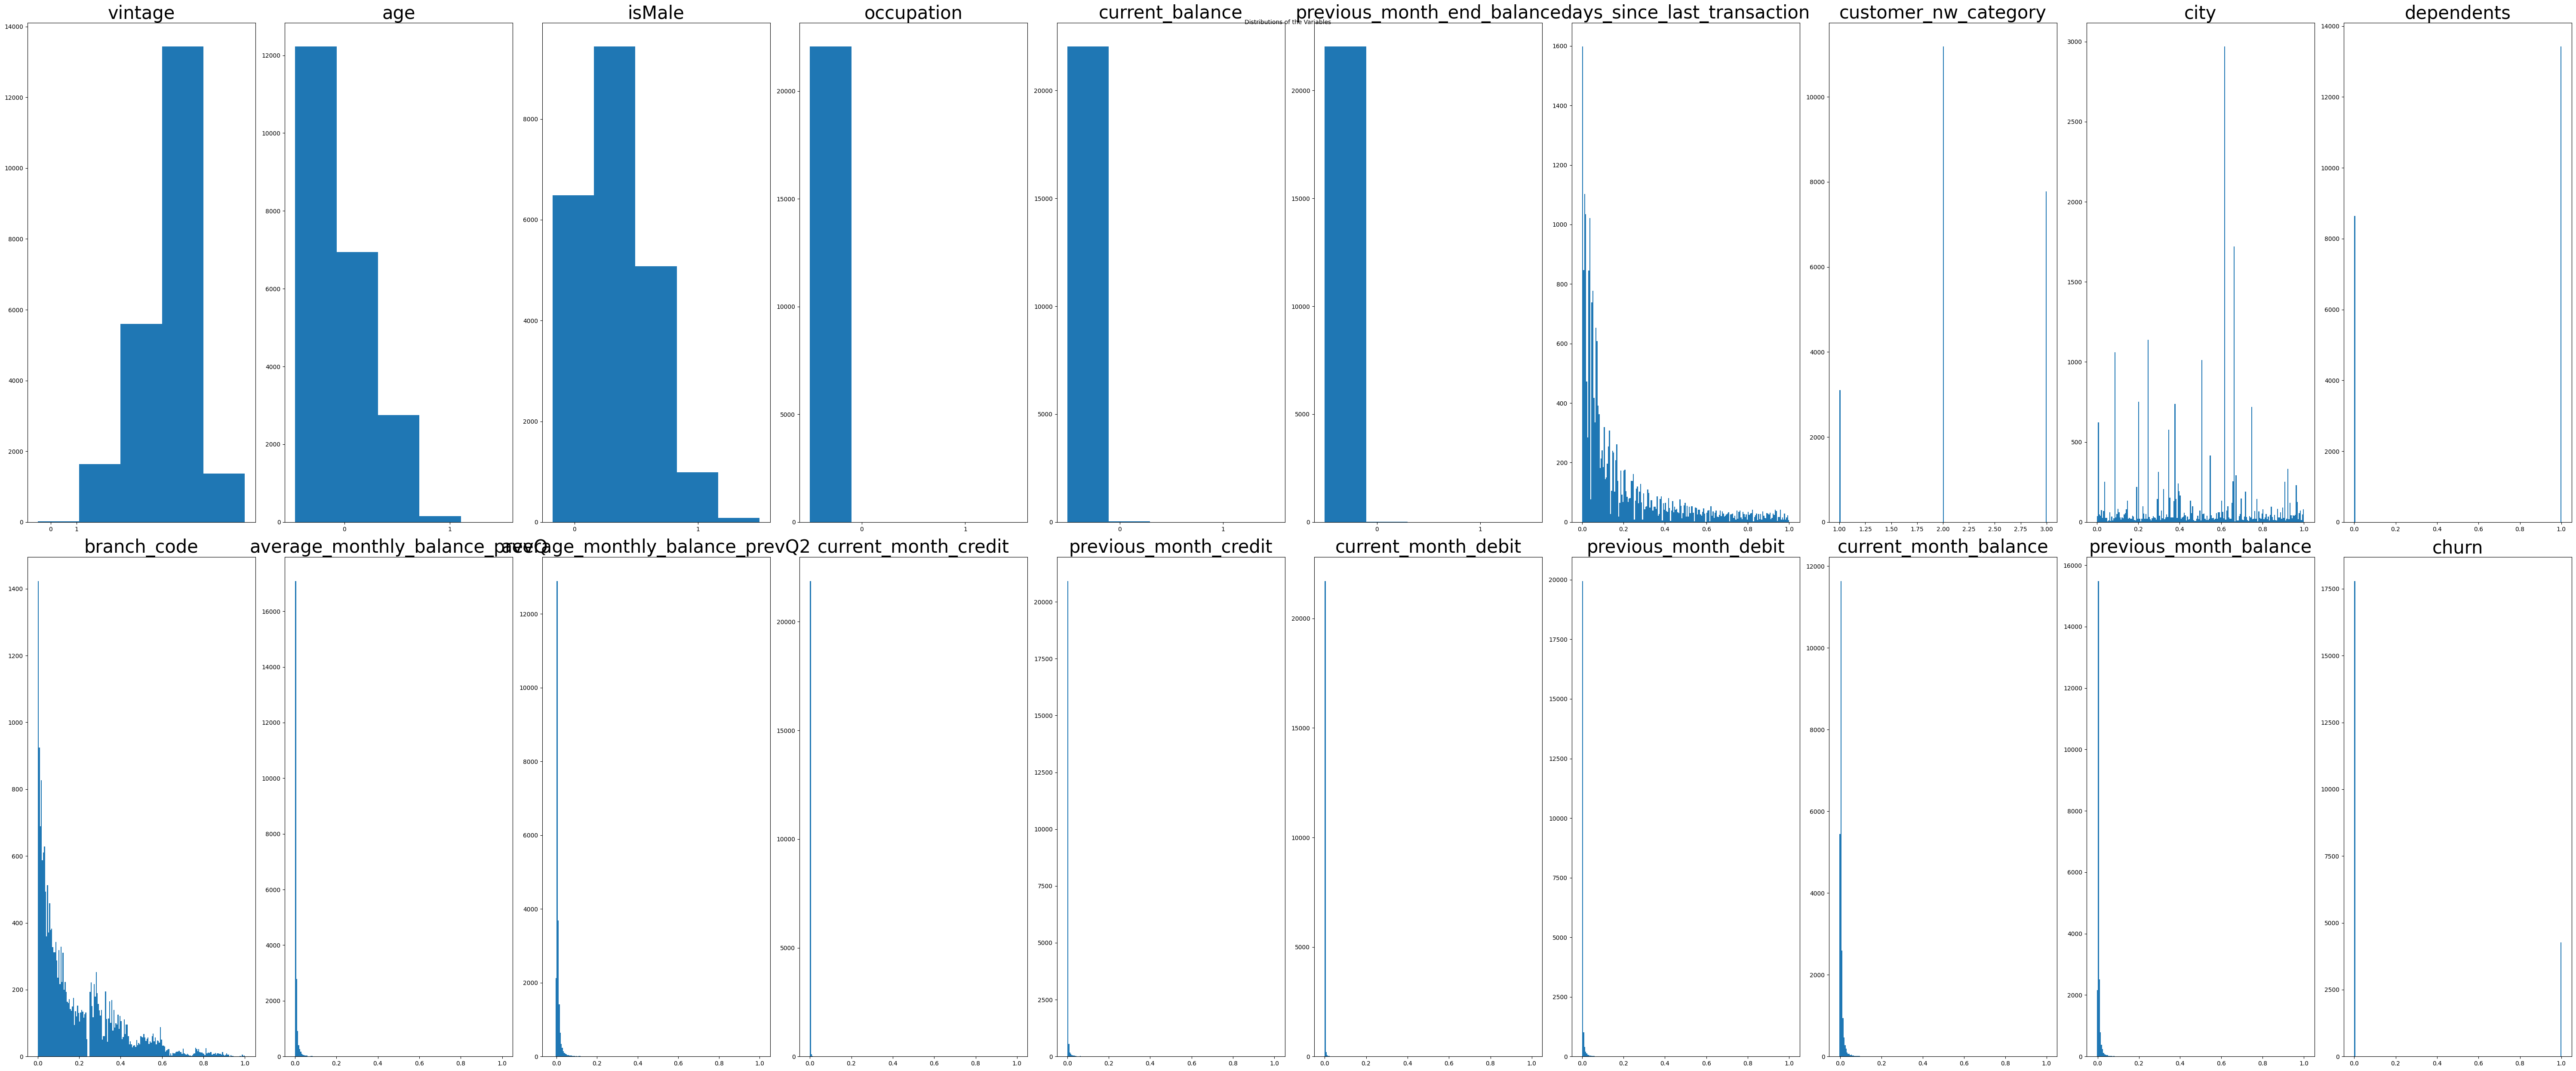

In [60]:
list_binary = [20]
list_normal = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
order = [0, 1, 2, 4, 9, 10, 8, 6, 5, 3, 7, 11, 12, 13, 14, 15, 16, 17, 18, 19]

fig = plt.figure(figsize=(60, 25))
for i in range(len(order)):
    xi = denorm_bank_data.values[:, order[i]]
    ax1 = fig.add_subplot(2, int(len(order)/2), i + 1)
    plt.title(list(dataset)[order[i]], fontsize=30)
    if i < 6:
        plt.hist(xi, 5)
        plt.xticks([0.25, 0.75], np.arange(0, 2, 1))
    else:
        plt.hist(xi, 200)

plt.subplots_adjust(hspace= 7 )
plt.tight_layout()
plt.suptitle('Distributions of the Variables', fontsize=10)
plt.show()


**How much money has been lost due to customers leaving the institution?**

In [64]:
lost_savings = df_upsampled.loc[df_upsampled['churn'] == 1, 'current_balance'].sum()
print(lost_savings)

621.6770468981307


**Correlation between the Variables**

<ipython-input-90-5c7335905e6e>:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



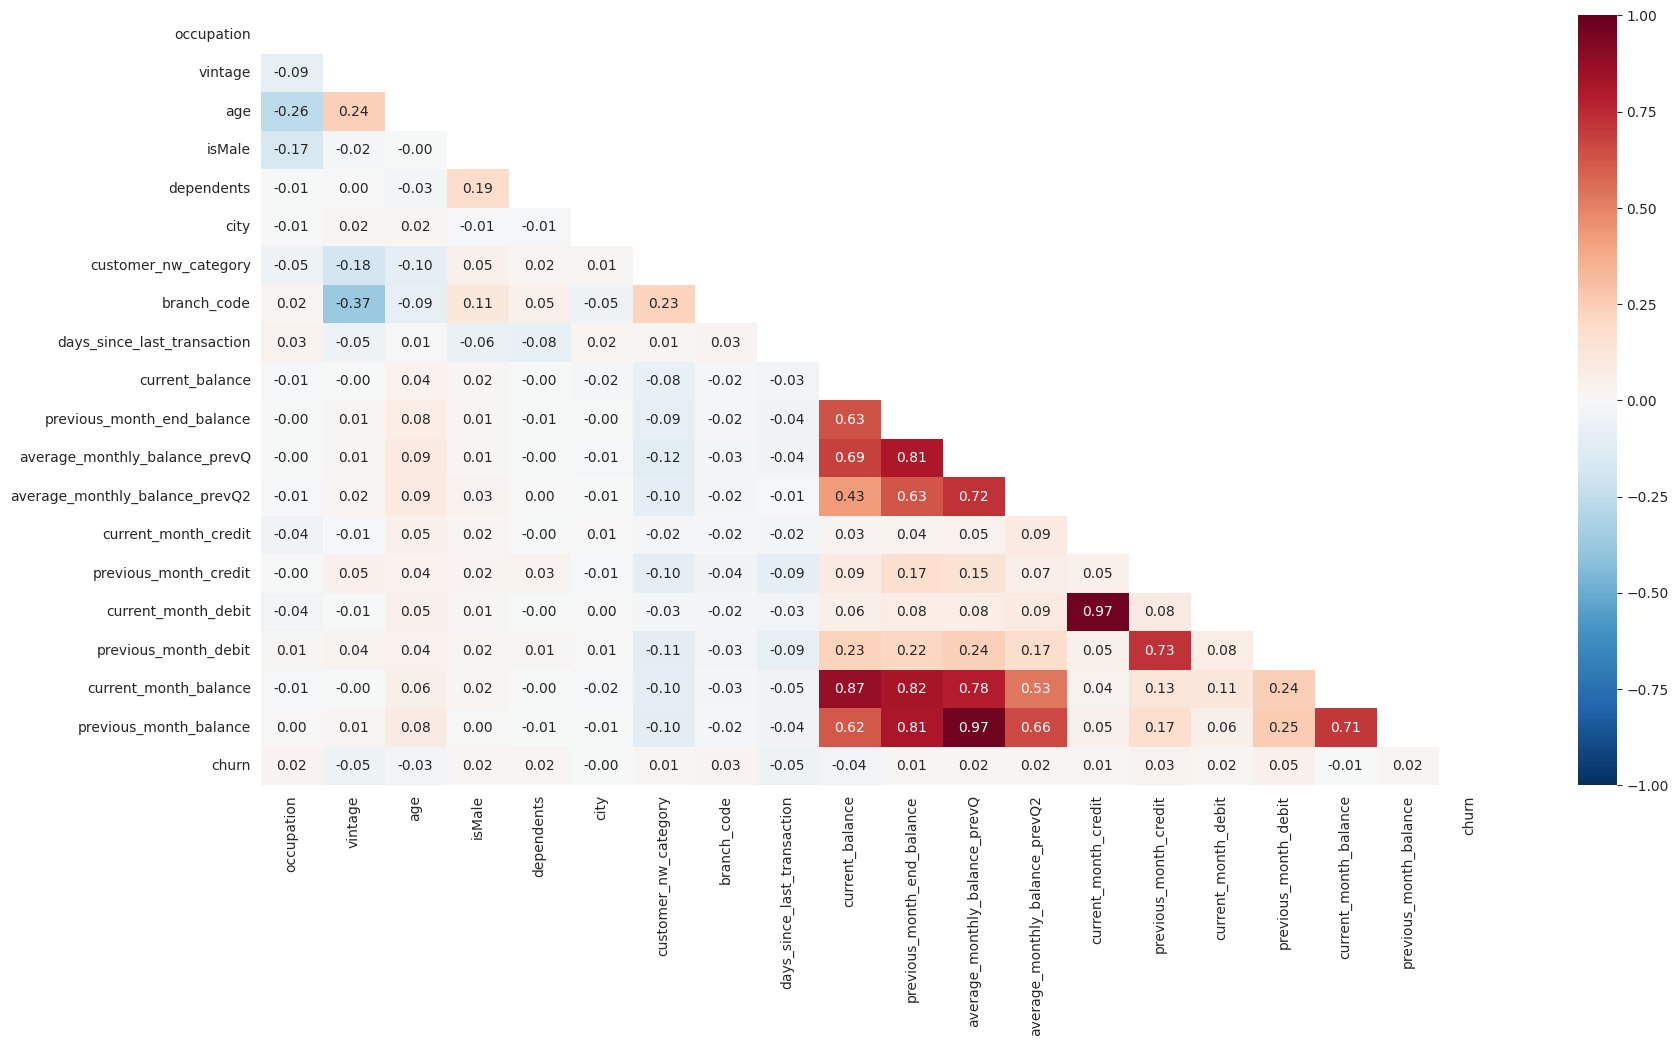

In [90]:
fig=plt.figure(figsize=(20,10))
CX=df_upsampled.corr()
mask = np.zeros_like(CX, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heat=sb.heatmap(CX,mask=mask,annot=True, vmin=-1, vmax=1, fmt='.2f',cmap='RdBu_r')
fig.add_subplot(heat)
plt.show()

<Axes: >

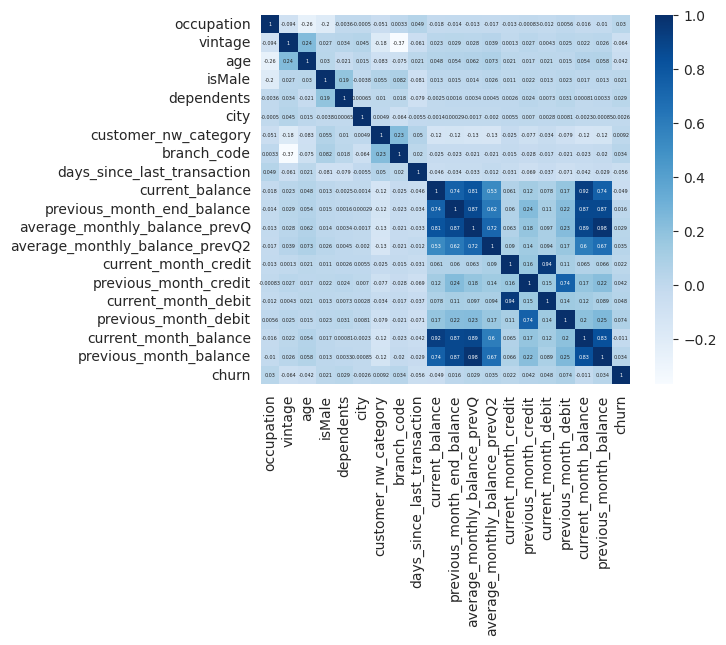

In [86]:
sns.heatmap(bank_data.corr(), annot=True, annot_kws={"size": 3.5}, cmap='Blues', square=True)



**Scale the data**

In [75]:
#Scaled the data
x = bank_data.drop('churn', axis=1)
y = bank_data['churn']
x = StandardScaler().fit_transform(x)

**Split the data into 80% training and 20% testing**

In [78]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)